In [1]:
from torchvision.models import vgg19

In [2]:
vgg19_model = vgg19(pretrained=True)

/opt/homebrew/anaconda3/envs/attn/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/attn/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
vgg19_model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [4]:
conv = {
    'conv1_1' : 0, # style
    'conv2_1' : 5, # style
    'conv3_1' : 10, # style
    'conv4_1' : 19, # style
    'conv5_1' : 28, # style
    'conv4_2' : 21, # content
}

In [5]:
import torch

x = torch.ones(1, 3, 256, 256)
y = vgg19_model.features[:conv['conv3_1']+1](x)
y.shape

torch.Size([1, 256, 64, 64])

In [1]:
from models import StyleTransfer

In [2]:
my_model = StyleTransfer()

/opt/homebrew/anaconda3/envs/attn/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/attn/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
import torch

x = torch.ones(1, 3, 256, 256)
y = my_model(x, 'content')
z = my_model(x, 'style')

print(len(y))
print(y[0].shape)

print(len(z))
print(z[0].shape)

content
style
1
torch.Size([1, 512, 32, 32])
5
torch.Size([1, 64, 256, 256])


In [1]:
from loss import StyleLoss

In [2]:
style_loss = StyleLoss()

In [3]:
import torch

feature_map = torch.ones(1,3,256,256)
G = style_loss.gram_matrix(feature_map)

In [5]:
G.shape

torch.Size([1, 3, 3])

In [6]:
G

tensor([[[0.0833, 0.0833, 0.0833],
         [0.0833, 0.0833, 0.0833],
         [0.0833, 0.0833, 0.0833]]])

In [13]:
G*3*256*256*4

tensor([[[65536., 65536., 65536.],
         [65536., 65536., 65536.],
         [65536., 65536., 65536.]]])

In [14]:
256*256

65536

In [4]:
x = torch.ones(1, 3, 256, 256)
y = torch.zeros(1, 3, 256, 256)

In [5]:
style_loss(x, y)

tensor(0.0069)

In [1]:
import torch
from PIL import Image
from train import pre_processing, post_processing

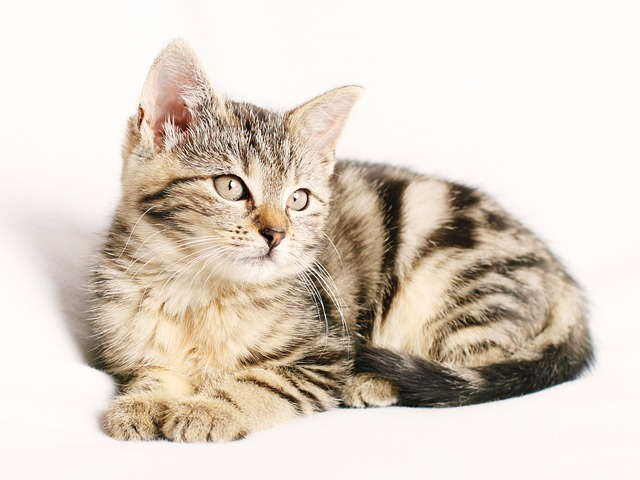

In [2]:
image = Image.open('./cat.jpg')
image

In [3]:
image_tensor = pre_processing(image)
image_tensor.shape

torch.Size([1, 3, 512, 512])

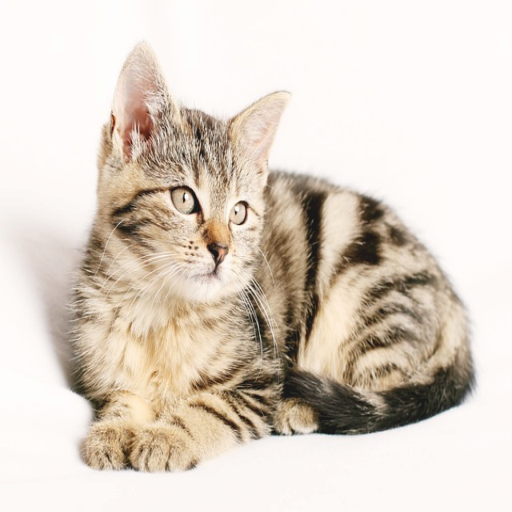

In [5]:
image_pil = post_processing(image_tensor)
image_pil